In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.shape)
print(df.nunique())

(21613, 21)
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:xlabel='price', ylabel='Density'>

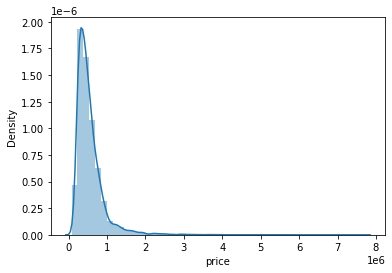

In [6]:
sns.distplot(df['price'])

<AxesSubplot:>

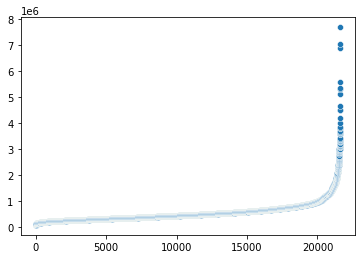

In [7]:
sns.scatterplot(range(df.shape[0]), np.sort(df.price.values))

<AxesSubplot:>

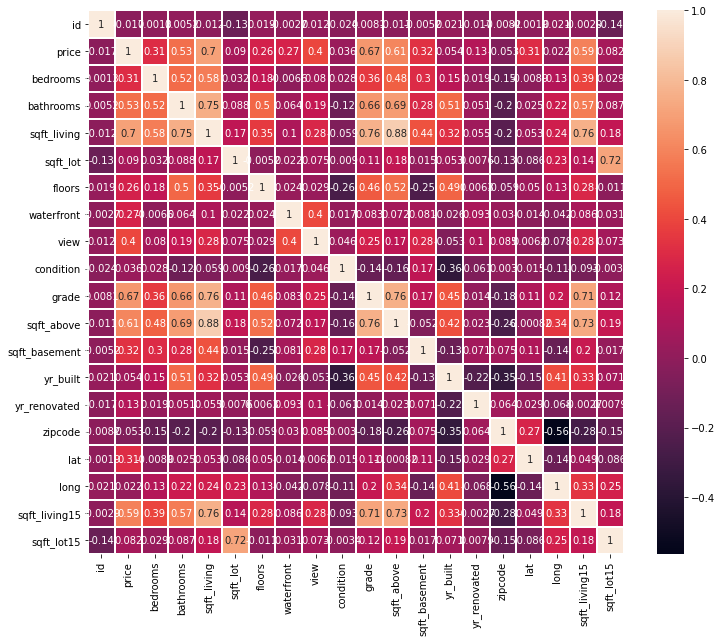

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), linewidths=0.25, annot=True, ax=ax)

In [9]:
del df['id']
del df['date']

In [10]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [11]:
sc = [StandardScaler(), MinMaxScaler()]
md = [LinearRegression(), Ridge(), Lasso()]
ml = []
sl = []
msel = []
pcal = []

for m in md:
    m.fit(X_train, y_train)
    y_pred_train = m.predict(X_train)
    ml.append(str(m))
    sl.append('none')
    msel.append(metrics.mean_squared_error(y_train, y_pred_train))
    pcal.append('no')
    for s in sc:
        x = s.fit_transform(X_train)
        m.fit(x, y_train)
        y_pred_train = m.predict(x)
        ml.append(str(m))
        sl.append(str(s))
        msel.append(metrics.mean_squared_error(y_train, y_pred_train))
        pcal.append('no')
        
        steps = [
            ('scale', s),
            ('pca', PCA()),
            ('estimator', m)
        ]
        pipe = Pipeline(steps)
        pipe.fit(X_train, y_train)
        y_pred_train = pipe.predict(X_train)
        
        ml.append(str(m))
        sl.append(str(s))
        msel.append(metrics.mean_squared_error(y_train, y_pred_train))
        pcal.append('yes')

In [12]:
pd.set_option('float_format', '{:f}'.format)

dict = {'model': ml, 'scaler': sl, 'mse': msel, 'pca': pcal} 
results = pd.DataFrame(dict, index=None)
results

,model,scaler,mse,pca
0,LinearRegression(),none,38109359317.543221,no
1,LinearRegression(),StandardScaler(),38109359317.543243,no
2,LinearRegression(),StandardScaler(),38109359317.543243,yes
3,LinearRegression(),MinMaxScaler(),38109359317.543236,no
4,LinearRegression(),MinMaxScaler(),38109359317.543236,yes
5,Ridge(),none,38109698617.306694,no
6,Ridge(),StandardScaler(),38109359614.447319,no
7,Ridge(),StandardScaler(),38109359614.447304,yes
8,Ridge(),MinMaxScaler(),38123451232.637222,no
9,Ridge(),MinMaxScaler(),38123451232.637215,yes


In [13]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred_train))

38109359317.54322


In [14]:
results.sort_values(by='mse')

,model,scaler,mse,pca
0,LinearRegression(),none,38109359317.543221,no
3,LinearRegression(),MinMaxScaler(),38109359317.543236,no
4,LinearRegression(),MinMaxScaler(),38109359317.543236,yes
1,LinearRegression(),StandardScaler(),38109359317.543243,no
2,LinearRegression(),StandardScaler(),38109359317.543243,yes
12,Lasso(),StandardScaler(),38109359351.481590,yes
11,Lasso(),StandardScaler(),38109359359.351685,no
7,Ridge(),StandardScaler(),38109359614.447304,yes
6,Ridge(),StandardScaler(),38109359614.447319,no
10,Lasso(),none,38109359638.094421,no


	model	scaler	mse	pca
0	LinearRegression()	none	38109359317.543221	no

In [15]:
y_pred = lr.predict(X_test)

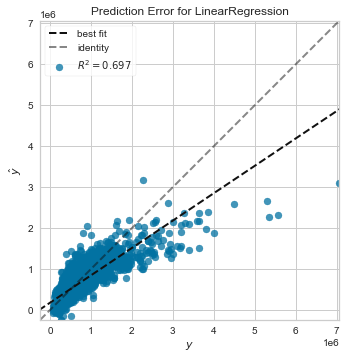

In [16]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(lr, X_train, y_train, X_test, y_test)